In [37]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils import Lung_Dataset, AugmentedDataset, make_prediction, label_dict

In [38]:
base_dir = "D:\SUTD\Deeplearning\DLSP"
data_dir = os.path.join(base_dir, "dataset")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [39]:
train_set = Lung_Dataset("train", base_dir=data_dir)
test_set = Lung_Dataset("test", base_dir=data_dir)
val_set1 = Lung_Dataset("val", base_dir=data_dir)
val_set2 = Lung_Dataset("val", transform=1, base_dir=data_dir)
val_set3 = Lung_Dataset("val", transform=2, contrast=1, brightness=1, base_dir=data_dir)
val_set4 = Lung_Dataset("val", transform=4, contrast=1, brightness=1, base_dir=data_dir)
val_set = AugmentedDataset(val_set1, val_set2, val_set3, val_set4)

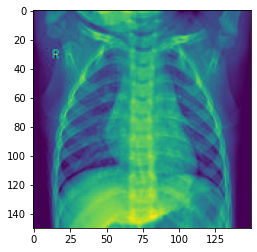

In [40]:
train_set.show_img("normal", 1)

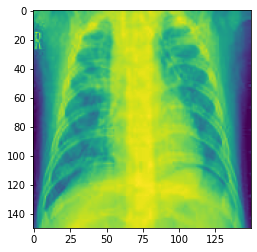

In [41]:
train_set.show_img("covid", 1)

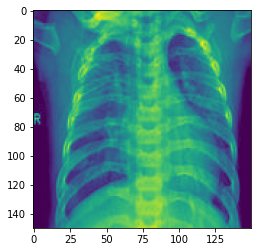

In [42]:
train_set.show_img("non-covid", 1)

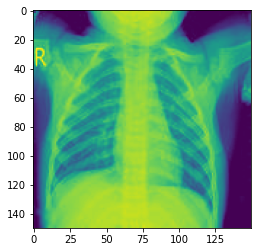

In [43]:
val_set.show_img("val", 4, 1)

In [54]:
three_class_model = torch.load(f"{base_dir}/saved_models/three_class_101_model.h5")
infected_model = torch.load(f"{base_dir}/saved_models/infected_classifier_101_model.h5")
covid_model = torch.load(f"{base_dir}/saved_models/covid_classifier_101_model.h5")

D:\Programs\sdk\anaconda\lib\site-packages\torch\serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
D:\Programs\sdk\anaconda\lib\site-packages\torch\serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
D:\Programs\sdk\anaconda\lib\site-packages\torch\serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attr

Validation set pictures with predicted and ground truth labels
Average performance 8/25=32.000%


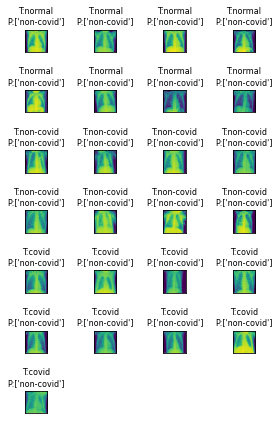

In [63]:
plt.figure(figsize=(4,6))
correct_count = 0
for index, (image, label) in enumerate(DataLoader(val_set1, batch_size=1)):
    x = image.to(device)
    label = label_dict[torch.argmax(label).item()]
    predicted_labels = make_prediction(x, infected_model, covid_model)
    plt.subplot(7, 4, index+1)
    plt.xticks([], [])
    plt.yticks([], [])
    if predicted_labels[0] == label:
        correct_count += 1
    plt.title(f"T:{label}\nP:{predicted_labels}", fontsize=8)
    ex = image.detach().cpu().squeeze(0).numpy()
    plt.imshow(np.transpose(ex, (1,2,0)))
plt.tight_layout()
plt.show()
# plt.savefig("image_view.png")
print(f"Validation set pictures with predicted and ground truth labels\nAverage performance {correct_count}/{len(val_set1)}={correct_count/float(len(val_set1)) * 100:.3f}%")